# Riesgo por incumplimiento de pagos en créditos de vivienda
---------------------------------------------------------------------------------------------------------------------------

**Autor:** Cristhian David Tafur Hernández

**Asesor:** Raul Ramos


Notebook: 06 Reducción de dimensionalidad y prueba de desempeño

Objetivo de la Iteración:

Evaluar el desempeño del mejor modelo identificado reduciendo la dimensionalidad del dataset ampliado por medio de dos técnicas, la primera seleccionando solo una parte de la Features de acuerdo a una métrica de importancia de las mismas, y por otro aplicando la técnica de análisis de componentes principales.


## Preparación de entorno de trabajo

In [ ]:
# Básicas
# ==============================================================================
import pandas as pd
import numpy as np

# Preporcesamiento de datos
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Elección de hiperparametros
# ==============================================================================
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold


# Modelamiento
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# PCA
# ==============================================================================
from sklearn.decomposition import PCA

# Graficación
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_lectura ='/content/drive/MyDrive/Monografia/data_modelo/'

## 00. Lectura de datos procesados para los modelos

In [ ]:
# División estratificada (DATA AMPLIADA)
print('Distribución del target: Data train estratificada')

X_train = pd.read_csv (ruta_lectura + 'X_train_ampliada.csv', header=None)
y_train = pd.read_csv (ruta_lectura + 'y_train_ampliada.csv', header=None)
X_train = np.array(X_train)
y_train = np.array(y_train).reshape((-1))


X_test = pd.read_csv (ruta_lectura + 'X_test_ampliada.csv', header=None)
y_test = pd.read_csv (ruta_lectura + 'y_test_ampliada.csv', header=None)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape((-1))

features_names = pd.read_csv (ruta_lectura + "feature_names_ampliada.csv")
features_names = features_names['0'].tolist()

Distribución del target: Data train estratificada


## 01. Modelo base con información ampliada

In [ ]:
#definimos funciona para mostrar los resultados

def mostrar_resultados(y_test, x_test, model_fit, normalize = None):
    pred_y = model_fit.predict(x_test)
    disp = plot_confusion_matrix(model_fit, x_test, y_test,
                             cmap=plt.cm.Blues, 
                             normalize=normalize)
    
    disp.ax_.set_title('MC normalizada')
    plt.show()
    print ('--------------------------------------------------------------------')
    print (classification_report(y_test, pred_y))

In [ ]:
# Modelo RF con la mejor especificación probada
def run_rforest_balanced(X_train, y_train):
    rforest_b = RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                                      n_estimators=200, random_state=0) 
    
    rforest_b.fit(X_train, y_train)
    return rforest_b

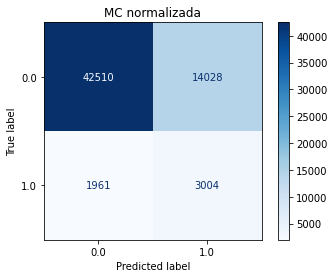

--------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84     56538
         1.0       0.18      0.61      0.27      4965

    accuracy                           0.74     61503
   macro avg       0.57      0.68      0.56     61503
weighted avg       0.89      0.74      0.80     61503



In [ ]:
rforest = run_rforest_balanced(X_train, y_train)
mostrar_resultados(y_test, X_test, rforest)

## 02. Reducción de dimensionalidad seleccionando solo las variables con mayor importancia

In [ ]:
#Ejercicio de código
importances = rforest.feature_importances_
forest_importances = pd.Series(importances, index=features_names)
forest_importances = pd.DataFrame(forest_importances).sort_values(by=[0], ascending=False)
forest_importances['cumsum'] = forest_importances[0].cumsum()

In [ ]:
selec_features = forest_importances[forest_importances['cumsum']<=0.8]
selec_features = selec_features.index.tolist()

In [ ]:
len(selec_features)

64

In [ ]:
X_selec = pd.DataFrame(X_train, columns=features_names)
X_selec = X_selec[selec_features]
X_selec = np.array(X_selec)

X_selec_test = pd.DataFrame(X_test, columns=features_names)
X_selec_test = X_selec_test[selec_features]
X_selec_test = np.array(X_selec_test)

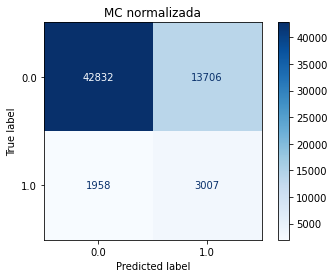

--------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85     56538
         1.0       0.18      0.61      0.28      4965

    accuracy                           0.75     61503
   macro avg       0.57      0.68      0.56     61503
weighted avg       0.89      0.75      0.80     61503



In [ ]:
rforest = run_rforest_balanced(X_selec, y_train)
mostrar_resultados(y_test, X_selec_test, rforest)

## 02. Reducción de dimensionalidad por medio de PCA

In [ ]:
X_train.shape

(246008, 441)

In [ ]:
# Generación de componentes y evaluación de aporte a la explicación de la varianza
dic_apor_c_pca = {}
for i in range(2,X_train.shape[1], 10):
  aporte_acum = PCA(n_components=i).fit(X_train).explained_variance_ratio_
  dic_apor_c_pca[i] = round(sum(aporte_acum)*100, 2)

dic_apor_c_pca

{2: 15.59,
 12: 39.6,
 22: 51.05,
 32: 60.15,
 42: 67.56,
 52: 73.5,
 62: 78.44,
 72: 82.16,
 82: 85.24,
 92: 87.76,
 102: 89.9,
 112: 91.64,
 122: 93.01,
 132: 94.13,
 142: 95.05,
 152: 95.82,
 162: 96.5,
 172: 97.09,
 182: 97.55,
 192: 97.94,
 202: 98.28,
 212: 98.57,
 222: 98.83,
 232: 99.05,
 242: 99.23,
 252: 99.39,
 262: 99.52,
 272: 99.63,
 282: 99.73,
 292: 99.8,
 302: 99.86,
 312: 99.91,
 322: 99.94,
 332: 99.96,
 342: 99.98,
 352: 99.99,
 362: 99.99,
 372: 99.99,
 382: 100.0,
 392: 100.0,
 402: 100.0,
 412: 100.0,
 422: 100.0,
 432: 100.0}

In [ ]:
modelo_pca = PCA(n_components=90)
X_train_pca = modelo_pca.fit_transform(X_train)
X_test_pca = modelo_pca.fit_transform(X_test)

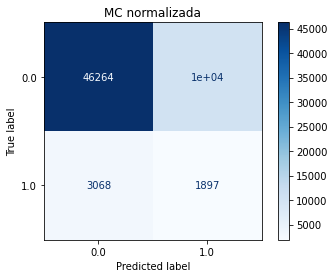

--------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.87     56538
         1.0       0.16      0.38      0.22      4965

    accuracy                           0.78     61503
   macro avg       0.55      0.60      0.55     61503
weighted avg       0.87      0.78      0.82     61503



In [ ]:
# Modelo RandomForest 1.1: RandomForest controlando el desbalance con el hiperparametro del algoritmo de clasificación
rforest = run_rforest_balanced(X_train_pca, y_train)
mostrar_resultados(y_test, X_test_pca, rforest)

# Conclusión de la iteración:

El accuracy mejora con las dos estrategias de reducción de dimensionalidad. Sin embargo, con el PCA el modelo aprende a identificar mejor la clase mayoritaria pero peor la minoritaria

